In [1]:
import os, pandas as pd

In [2]:
bucket = os.environ["PROJECT_BUCKET"]
s3_path = f"s3://{bucket}/raw/consumer_complaints.csv"
df = pd.read_csv(s3_path)

C:\Users\abc\AppData\Local\Temp\ipykernel_2392\1591103411.py:3: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(s3_path)


In [7]:
df.head()  # Display the first few rows of the DataFrame

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [6]:
df.shape

(555957, 18)

In [8]:
df.info()  # Display information about the DataFrame, including column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [9]:
df.isna().mean().sort_values(ascending=False).head(10)

consumer_complaint_narrative    0.879836
tags                            0.859775
company_public_response         0.846887
consumer_consent_provided       0.777936
sub_issue                       0.617557
sub_product                     0.284774
state                           0.008790
zipcode                         0.008103
date_sent_to_company            0.000000
consumer_disputed?              0.000000
dtype: float64

In [10]:
df_clean = df.dropna(subset=['consumer_complaint_narrative'])
df_clean.shape  # Check the shape after dropping rows with NaN in 'consumer_complaint_narrative'

(66806, 18)

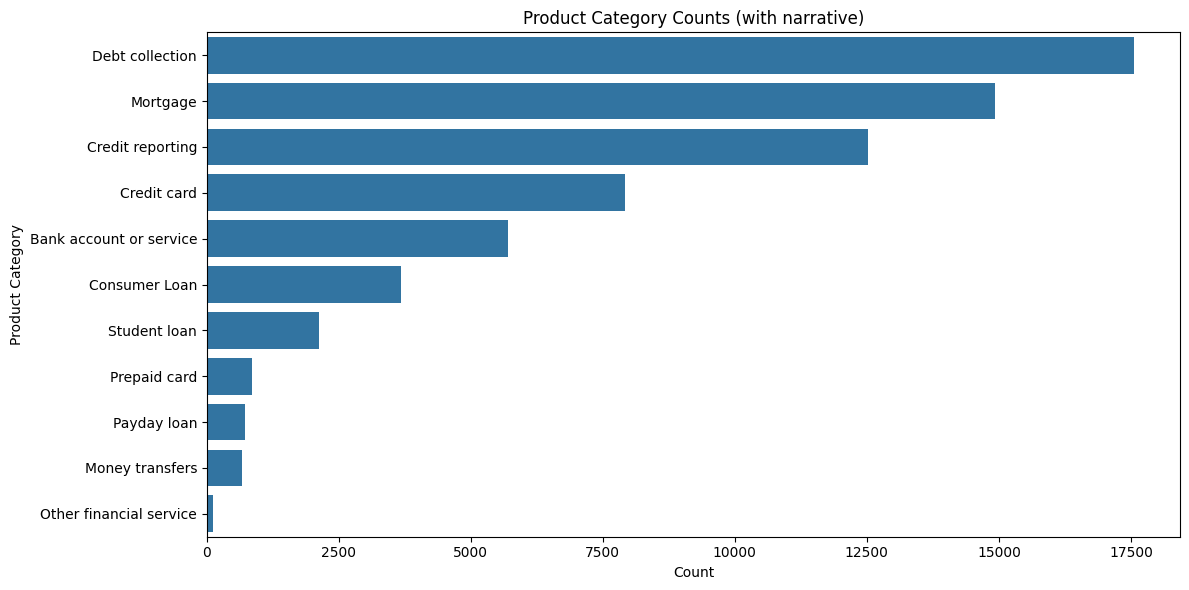

product
Debt collection            17552
Mortgage                   14919
Credit reporting           12526
Credit card                 7929
Bank account or service     5711
Consumer Loan               3678
Student loan                2128
Prepaid card                 861
Payday loan                  726
Money transfers              666
Other financial service      110
Name: count, dtype: int64


In [15]:
import matplotlib.pyplot as plt, seaborn as sns

prod_count = df_clean['product'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=prod_count.values, y=prod_count.index)
plt.title('Product Category Counts (with narrative)')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

print(prod_count)

In [18]:
from sklearn.preprocessing import LabelEncoder

# 只保留前N大类别，其余合并为'Other'
topN = 8
top_products = df_clean['product'].value_counts().index[:topN]
df_clean['product_processed'] = df_clean['product'].where(df_clean['product'].isin(top_products), 'Other')

# 标签编码
le = LabelEncoder()
df_clean['product_label'] = le.fit_transform(df_clean['product_processed'])

# 保存编码映射，后续预测时用
label2product = dict(zip(df_clean['product_label'], df_clean['product_processed']))
product2label = dict(zip(df_clean['product_processed'], df_clean['product_label']))

C:\Users\abc\AppData\Local\Temp\ipykernel_2392\575336268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['product_processed'] = df_clean['product'].where(df_clean['product'].isin(top_products), 'Other')
C:\Users\abc\AppData\Local\Temp\ipykernel_2392\575336268.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['product_label'] = le.fit_transform(df_clean['product_processed'])


C:\Users\abc\AppData\Local\Temp\ipykernel_2392\1698255030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_len'] = df_clean['consumer_complaint_narrative'].apply(lambda x: len(str(x)))


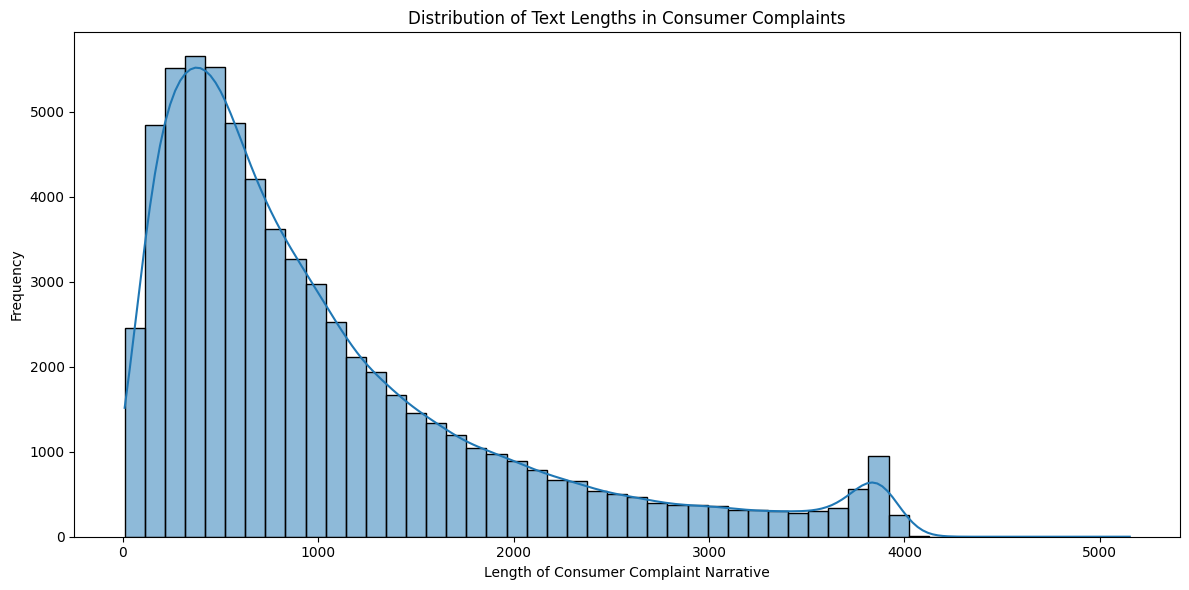

In [16]:
df_clean['text_len'] = df_clean['consumer_complaint_narrative'].apply(lambda x: len(str(x)))
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['text_len'], bins=50, kde=True)
plt.title('Distribution of Text Lengths in Consumer Complaints')
plt.xlabel('Length of Consumer Complaint Narrative')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [17]:
df_clean['text_len'].describe()

count    66806.000000
mean      1039.587327
std        910.270430
min         10.000000
25%        391.000000
50%        740.000000
75%       1383.000000
max       5153.000000
Name: text_len, dtype: float64

In [20]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(t: str) -> str:
    if pd.isna(t):
        return ""
    t = t.lower()
    t = re.sub(r"http\S+|www\S+", " ", t)         # 去掉网址
    t = re.sub(r"[^a-z0-9\s]", " ", t)            # 仅保留字母数字空格
    t = re.sub(r"\s+", " ", t).strip()            # 去除多余空格
    # 去除停用词
    t = " ".join([word for word in t.split() if word not in stop_words])
    return t

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [21]:
df_clean['clean_text'] = df_clean['consumer_complaint_narrative'].apply(clean_text)
clean_df = df_clean[df_clean['clean_text'] != ""]
print("After cleaning:", len(clean_df))


After cleaning: 66805


C:\Users\abc\AppData\Local\Temp\ipykernel_2392\2139996460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clean_text'] = df_clean['consumer_complaint_narrative'].apply(clean_text)


In [22]:
from sklearn.model_selection import train_test_split

# 假设 clean_df 已经包含 'clean_text' 和 'product_label' 两列
X = clean_df['clean_text']
y = clean_df['product_label']

# 先划分 train 和 temp（val+test）
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 再划分 val 和 test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# 可选：合并为 DataFrame 方便后续处理
train_df = pd.DataFrame({'text': X_train, 'label': y_train})
val_df = pd.DataFrame({'text': X_val, 'label': y_val})
test_df = pd.DataFrame({'text': X_test, 'label': y_test})

In [24]:
train_df.head()  # 查看训练集的前几行

,text,label
548031,wells fargo bill atty services xxxx xxxx xxxx ...,5
280114,account usaa called xxxx xxxx xxxx data breach...,0
535843,xxxx xxxx unauthorized charges made xxxx xxxx ...,3
278070,bank american owed 8000 00 funds said owed tim...,5
275429,urgent sheriff sale xxxx xxxx 2015hi wells far...,5


In [23]:
train_df.to_csv('../data/train.csv', index=False)
val_df.to_csv('../data/val.csv', index=False)
test_df.to_csv('../data/test.csv', index=False)

In [ ]:
# from transformers import BertTokenizer

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# df_clean['token_len'] = df_clean['consumer_complaint_narrative'].apply(lambda x: len(tokenizer.tokenize(str(x))))
# df_clean['token_len'].describe()

e:\anaconda3\envs\nlp-complaint\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
e:\anaconda3\envs\nlp-complaint\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\abc\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see

count    66806.000000
mean       236.188097
std        209.171787
min          2.000000
25%         88.000000
50%        168.000000
75%        314.000000
max       3802.000000
Name: token_len, dtype: float64